# **Aprendizaje no supervisado**
# UL08. Principal component analysis (PCA)

## <font color='blue'>**Métodos lineales de reducción**</font>

En este notebook, se presentará el  Análisis de componentes principales (PCA) para reducción de dimensionalidad y extracción de características.

El método tiene implementaciones listas para usar en scikit-learn que son útiles para sus proyectos, pero para el propósito de este notebook  es implementar el métodos desde cero, usando solo OpenCV para abrir y guardar imágenes, y NumPy para manejar matrices.

El objetivo de PCA es obtener un subespacio (es decir, unas dimensiones más bajas) y proyectar la nube de puntos de datos al subespacio sin perder información incrustada en los datos originales con dimensiones más altas, por lo que busca un vector que maximice la variación de los datos.

## <font color='blue'>**Principal component analysis (PCA)**</font>

Si se pregunta por qué PCA es útil, estos son  los 3 principales beneficios:

1. Reduce el tiempo de entrenamiento, debido a un conjunto de datos más pequeño
2. Elimina el ruido al mantener solo lo relevante
3. Hace posible la visualización, en los casos en que tiene un máximo de 3 componentes principales

Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información. Supóngase que existe una muestra con $n$ individuos cada uno con $p$ variables aleatorias $(X_1, X_2, …, X_p)$, es decir, el espacio muestral tiene $p$ dimensiones. PCA permite encontrar un número de factores subyacentes ($z<p$) que explican aproximadamente lo mismo que las p variables originales. Donde antes se necesitaban $p$ valores para caracterizar a cada individuo, ahora bastan $z$ valores. Cada una de estas $z$ nuevas variables recibe el nombre de componente principal. Esta tecnica pertenece a la familia de aprendizaje no supervisado. 

PCA aborda esta tarea mediante la identificación de componentes principales, que son combinaciones lineales de las características originales. Estos componentes se extraen de modo que el primer componente principal encapsula la varianza máxima en el conjunto de datos, el segundo encapsula la varianza restante mientras no está correlacionado con el primero, y así sucesivamente.


## La intuición

¿Como proyectamos a una dimensión maximizando la varianza?

![Intuición1](https://drive.google.com/uc?export=view&id=1beHxJDJHK3pcLhMvaBSyxBCJSvY8jzDB)

¿Y en este caso?

![Intuición1](https://drive.google.com/uc?export=view&id=1thu-DS8nDdskRm3jwN4mF3lce3ZR821_)



Esto lo podemos modelar como un problema de maximización:

$$ \max_{v_1} (\frac{1}{n} \sum_{i=1}^n (U_1^Tx_i - U_1^T\bar{x})^2)$$ asumiendo $\bar{x}=0$, se tiene
$$ \max_{v_1} (\frac{1}{n} \sum_{i=1}^n (U_1^Tx_i)^2)$$, sujeto a $$ ||U_1||=1$$

Esta aproximación se llama **variance maximization approach**.

Al desarrollar el cuadrado obtenemos.

$$ \frac{1}{n}\sum_{i=1}^n(U_1^Tx_i)^2= U_1^T\frac{(X^TX)}{n}U_1$$,
Donde $\frac{(X^TX)}{n}$ es la matriz de covarianza.


Si quiere seguir profundizando puede ver:
https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9


Otra forma de ver el problema es establecerlo como un problema de minimización.

Otra forma de pensar en PCA es que se ajusta a la mejor línea que atraviesa nuestros datos con el objetivo de minimizar el error de proyección "d" para cada punto. Este enfoque se denomina enfoque de minimización de la distancia.

$$d^2 = ||x_i||^2 - (U_1^Tx_i)^2$$
$$=(x_i^Tx_i)-(U_1^Tx_i)^2$$

Entonces se quiere minimizar:

$$ \min_{U_1}\sum_{i=1}^n (x_i^Tx_i)-(U_1^Tx_i)^2$$ Sujeto a 
$$ ||U_1||=1$$

La solución de estos problemas de optimización nos entregan las componentes principales.




## <font color='green'>**Actividad 1**</font>


El objetivo de esta actividad es aplicar el siguiente procedimiento para calcular las componentes principales y posteriormente visualizar las dos primeras componentes..


![Visualizando](https://drive.google.com/uc?export=view&id=1VRQlcNTke-Eo0MBpNJJhWH-2owg0otCa)







Vamos a analizar, un data set súper simple para aprender., Asi que vamos por con el conocido conjunto de datos Iris. Inicialmente tiene solo 4 características, aún imposible de visualizar y utilizaremos PCA para visualizar caracteristicas.

![Iris](https://drive.google.com/uc?export=view&id=1qdxrj1SSE64h3zzSZgGHH9J9x22WV48r)

Procedimiento:

1. Cargue la la siguiente data y transformelo a numpy.

```
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
```

2. Visualice la data y observe que tienen distintos valores. Por lo tanto es necesario normalizar la data. Utilice 

```
from sklearn.preprocessing import StandardScaler
```
3. Calcule la matriz de covariaza sobre las features.

```
features = X_scaled.T
cov_matrix = np.cov(features)
```

4. Calcule los autovalores, autovectores y el contenido de información de cada componente.



```
print(100*eig_val_cov/eig_val_cov.sum())
```

5. Proyecte las dos primeras componentes.

```
projected_1 = X_scaled.dot(eig_vec_cov.T[0])
```

6. Visualice las dos primeras componentes.

7. Compare el resultado con pca de sklearn.





In [1]:
import pandas as pd

In [2]:
# cargamos los datos del iris set
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
# revisamos las primeras observaciones
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# separamos en atributos y etiquetas
X = df.drop(columns = ['species']).values
y = df.species.values

In [6]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [7]:
# escalamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# obtenemos la matriz de varianzas y covarianzas
import numpy as np
features = X_scaled.T
cov_matrix = np.cov(features)

In [33]:
cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [12]:
# obtenemos los auto valores y auto vectores
from numpy.linalg import eig
eig_val_cov, eig_vec_cov = eig(cov_matrix)
print('E-value:', eig_val_cov)
print('E-vector', eig_vec_cov)

E-value: [2.93035378 0.92740362 0.14834223 0.02074601]
E-vector [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [13]:
# hallamos cuánto explican cada uno
print(100*eig_val_cov/eig_val_cov.sum())

[72.77045209 23.03052327  3.68383196  0.51519268]


In [18]:
# proyectamos las dos primeras componentes
projected_1 = X_scaled.dot(eig_vec_cov.T[0])
projected_2 = X_scaled.dot(eig_vec_cov.T[1])

In [19]:
print(projected_1.shape)
print(projected_2.shape)

(150,)
(150,)


In [70]:
# creamos df para color
color = np.append(np.zeros(int(projected_1.shape[0]/2)), np.ones(int(projected_1.shape[0]/2)))
pca2 = pd.DataFrame({'projected_1': projected_1,
                     'projected_2': projected_2,
                     'Component': color})

In [71]:
pca2.head()

,projected_1,projected_2,Component
0,-2.264542,-0.505704,0.0
1,-2.086426,0.655405,0.0
2,-2.367950,0.318477,0.0
3,-2.304197,0.575368,0.0
4,-2.388777,-0.674767,0.0


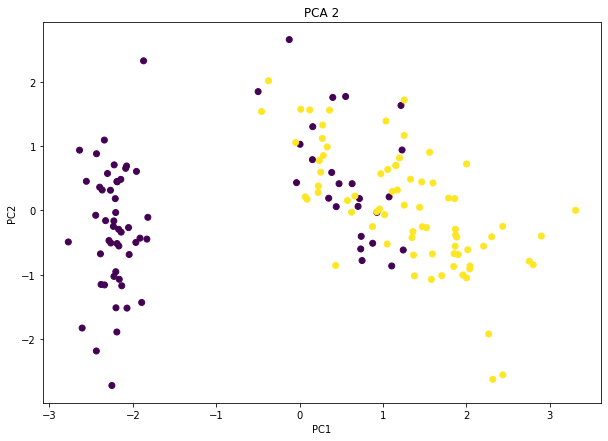

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(x = pca2.projected_1, y = pca2.projected_2, c=pca2.Component)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2");

In [76]:
u, s, vh = np.linalg.svd(cov_matrix, full_matrices=True)
u.shape, s.shape, vh.shape

((4, 4), (4,), (4, 4))

In [77]:
s

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

print(f"from scratch variance explained: {np.array(eig_val_cov/eig_val_cov.sum())[:2]}")

print(f"sklearn variance explained: {pca.explained_variance_ratio_}")

print(f"singular values sklearn: {pca.singular_values_}")

print(f"singular values from scratch: {s[:2]}")

from scratch variance explained: [0.72770452 0.23030523]
sklearn variance explained: [0.72770452 0.23030523]
singular values sklearn: [20.89551896 11.75513248]
singular values from scratch: [2.93035378 0.92740362]


In [65]:
pca2sl = pd.DataFrame(pca.fit_transform(X_scaled), columns = ['PC1', 'PC2'])
pca2sl_ = pd.concat([pca2sl, pd.Series(color, name = 'color')], axis = 1)
pca2sl_.head()

,PC1,PC2,color
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0


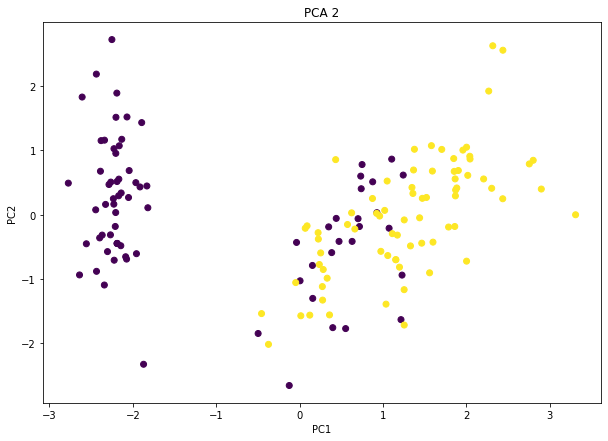

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 7))
plt.scatter(x = pca2sl_.PC1, y = pca2sl_.PC2, c=pca2sl_.color)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2");

<font color='green'>Fin Actividad 1</font>

## <font color='green'>Actividad 2</font>

## Compresión de una imagen a través del uso de PCA. 

Determine la cantidad de componentes necesarias para obtener una calidad adecuada. Primero realice un PCA y posteriormente invierta la transformación con las componentes seleccionadas. 

 
```
import numpy as np
import glob
import cv2
path1 = 'ruta imagenes'
images = []
for path in glob.glob(path1+"test/*.jpg"):
    images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))
```



In [79]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [128]:
import glob
import cv2
path1 = '/content/drive/MyDrive/Cursos/Data Science UDD/Aprendizaje No Supervisado/Imagenes/'
images = []
for path in glob.glob(path1+"*.jpg"):
    images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY))

In [161]:
img1 = images[0]

In [162]:
img1_s = scaler.fit_transform(img1)

In [163]:
pca_=PCA(img1.shape[1])

In [164]:
img1_new = pca_.fit_transform(img1)

In [165]:
df = pd.DataFrame(pca_.explained_variance_ratio_).sort_values(by = 0, ascending = False).cumsum()

In [166]:
len(df[df[0] <= 0.90])

19

In [167]:
pca_f = PCA(19)
img1_pca = pca_f.fit_transform(img1)
img1_pca_inv = pca_f.inverse_transform(img1_pca)

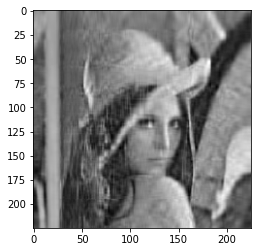

In [168]:
plt.imshow(img1_pca_inv, cmap = plt.cm.gray)

## Imagen 2

In [169]:
img2 = images[1]

In [170]:
img2_s = scaler.fit_transform(img2)

In [171]:
pca_=PCA(img2.shape[0])

In [172]:
img2.shape

(183, 275)

In [173]:
img2_new = pca_.fit_transform(img2)

In [174]:
df = pd.DataFrame(pca_.explained_variance_ratio_).sort_values(by = 0, ascending = False).cumsum()

In [175]:
n_pc = len(df[df[0] <= 0.90])
n_pc

8

In [176]:
pca_f = PCA(n_pc)
img2_pca = pca_f.fit_transform(img2)
img2_pca_inv = pca_f.inverse_transform(img2_pca)

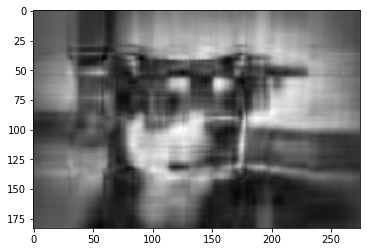

In [177]:
plt.imshow(img2_pca_inv, cmap = plt.cm.gray)

<font color='green'>Fin Actividad 2</font>

## <font color='green'>Actividad 3</font>

### Desafío 2: Realice esto mismo pero para el caso de una imagen color

```
from sklearn.decomposition import PCA
import cv2
# Para leer la imagen
img = cv2.imread(path1+ 'test/Pajaro.png')
```



In [158]:
from sklearn.decomposition import PCA
import cv2
# Para leer la imagen
img = cv2.imread(path1+ 'Pajaro.png')
img.shape

(256, 349, 3)

In [159]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [184]:
df_blue.shape

(256, 349)

In [186]:
#Splitting into channels
blue,green,red = cv2.split(img)

# scalamos los datos
df_blue = blue/255
df_green = green/255
df_red = red/255

# pca para cada uno de los df (canales)
pca_b = PCA(n_components=df_blue.shape[0])
pca_b.fit(df_blue)
df = pd.DataFrame(pca_b.explained_variance_ratio_).sort_values(by = 0, ascending = False).cumsum()
n_pc = len(df[df[0] <= 0.90])
n_pc
pca_b = PCA(n_pc)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

# definimos el número de pc de cada canal con criterio del 90% de varianza explicada
pca_g = PCA(n_components=df_green.shape[0])
pca_g.fit(df_green)
df = pd.DataFrame(pca_g.explained_variance_ratio_).sort_values(by = 0, ascending = False).cumsum()
n_pc = len(df[df[0] <= 0.90])
n_pc
pca_g = PCA(n_pc)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)


pca_r = PCA(n_components=df_red.shape[0])
pca_r.fit(df_red)
df = pd.DataFrame(pca_r.explained_variance_ratio_).sort_values(by = 0, ascending = False).cumsum()
n_pc = len(df[df[0] <= 0.90])
n_pc
pca_r = PCA(n_pc)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [187]:
# hacemos la transformación inversa de los datos para poder plotear la imagen
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(256, 349) (256, 349) (256, 349)


In [188]:
# reducimos la imagen (pasamos de tener los 3 canales por separado a tenerlos en un array)
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(256, 349, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


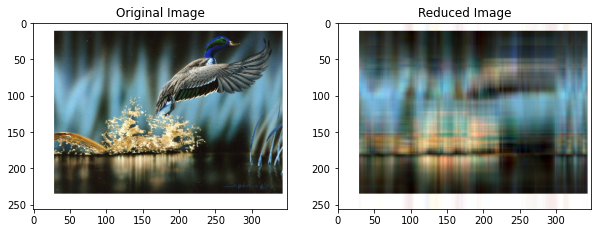

In [189]:
# ploteamos la imagen original vs la obtenida con PCA
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

## <font color='green'>Actividad 4</font>

Esta actividad tiene por objetivo extender los conceptos de PCA para el caso que existan comportamientos no lineales. Para esto se utilizará el concepto de Kernel utilizado en SVM.

**Kernel PCA:** PCA es un método lineal. Es decir, solo se puede aplicar a conjuntos de datos que son linealmente separables. Pero, si lo usamos para conjuntos de datos no lineales, podríamos obtener un resultado que puede no ser la reducción de dimensionalidad óptima. Kernel PCA utiliza una función de kernel para proyectar el conjunto de datos en un espacio de características de mayor dimensión, donde es linealmente separable. Es similar a la idea de Support Vector Machines.

Hay varios métodos de kernel como lineal, polinomial y gaussiano.

![Visualizando](https://drive.google.com/uc?export=view&id=1FKD98dSHLDrCMLv6JPgwpjyC9UmGri25)

En la imagen anterior, los datos estan en dos dimensiones. Los denotaremos por $x=(x_1,x_2)$. EN su forma original, los datos son inseparables en su espacio. Sin emabrgo a traves de la aplicación de una funcion kernel lo podemos transformar para ser separable linealmente.

$$ \phi \rightarrow x_1^2,x_2^2,\sqrt{2}x_1x_2$$

1. Utilice el conjunto de datos make_moons, genere un dataset y visualice su forma. 

2. Aplique el método de PCA y visualice sus componentes.

3. Aplique el método de kernel PCA y visualice sus componentes.

4. Genere alguna conclusión.

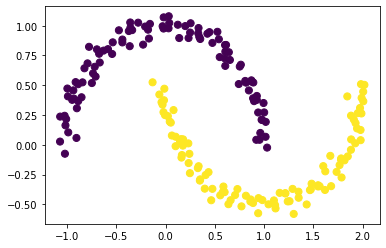

In [204]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50, c = y);

In [192]:
X.shape

(200, 2)

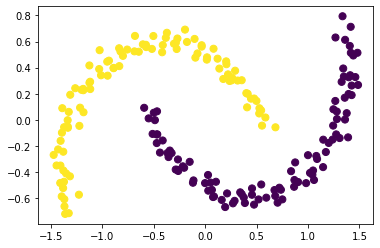

In [202]:
pca = PCA(2)
pca.fit(X)
transformed_X = pca.transform(X)

plt.scatter(transformed_X[:, 0], transformed_X[:, 1], s=50, c = y);

In [193]:
transformed_X.shape

(200, 2)

In [199]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='rbf', gamma = 15)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(200, 2)

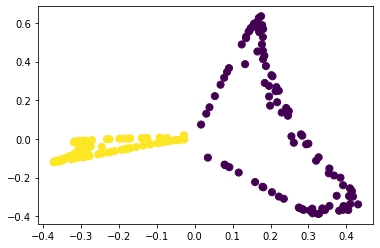

In [201]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=50, c = y);

<font color='green'>Fin Actividad 4</font>